In [40]:
import pandas as pd
import numpy as np
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [41]:
BASE_DIR = '../../data/'

In [42]:
def load_data():
    data = pd.read_csv(f'{BASE_DIR}test_data.csv')
    return data

In [43]:
data = load_data()

In [44]:
data

,Unnamed: 0,league_key,league_name,year,season,matchday,date,ta_key,tb_key,link,...,tb_lm_result_wavg,tb_lm_win_wavg,tb_lm_points_wavg,tb_lm_odds_wavg,tb_em_count,tb_em_goals_avg,tb_em_result_avg,tb_em_win_avg,tb_em_draw_avg,tb_em_points_avg
0,0,2liga,2. Bundesliga,2017,2016/2017,1,07.08.2016,1-fc-heidenheim-1846,fc-erzgebirge-aue,https://www.fussballdaten.de/2liga/2017/1/heid...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2liga,2. Bundesliga,2017,2016/2017,2,12.08.2016,1-fc-heidenheim-1846,1-fc-nuernberg,https://www.fussballdaten.de/2liga/2017/2/nuer...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2liga,2. Bundesliga,2017,2016/2017,3,26.08.2016,1-fc-heidenheim-1846,kickers-wuerzburg,https://www.fussballdaten.de/2liga/2017/3/heid...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2liga,2. Bundesliga,2017,2016/2017,4,09.09.2016,1-fc-heidenheim-1846,vfb-stuttgart,https://www.fussballdaten.de/2liga/2017/4/stut...,...,0.454545,0.727273,2.181818,1.950909,3.0,1.333333,0.333333,0.666667,0.000000,0.666667
4,4,2liga,2. Bundesliga,2017,2016/2017,5,17.09.2016,1-fc-heidenheim-1846,fortuna-duesseldorf,https://www.fussballdaten.de/2liga/2017/5/heid...,...,0.160000,0.160000,1.320000,2.952000,4.0,1.000000,0.250000,0.250000,0.750000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26523,26523,spanien,Primera División,2022,2021/2022,34,01.05.2022,real-sociedad-san-sebastian,rayo-vallecano,https://www.fussballdaten.de/spanien/2022/34/v...,...,0.131387,0.437956,1.569343,2.971752,33.0,1.030303,-0.121212,0.333333,0.212121,0.333333
26524,26524,spanien,Primera División,2022,2021/2022,35,06.05.2022,real-sociedad-san-sebastian,levante-ud,https://www.fussballdaten.de/spanien/2022/35/l...,...,-0.094891,0.233577,1.138686,3.607299,34.0,1.235294,-0.382353,0.147059,0.323529,0.147059
26525,26525,spanien,Primera División,2022,2021/2022,36,12.05.2022,real-sociedad-san-sebastian,fc-cadiz,https://www.fussballdaten.de/spanien/2022/36/s...,...,0.313869,0.547445,1.861314,4.426715,35.0,0.942857,-0.200000,0.200000,0.400000,0.200000
26526,26526,spanien,Primera División,2022,2021/2022,37,15.05.2022,real-sociedad-san-sebastian,fc-villarreal,https://www.fussballdaten.de/spanien/2022/37/v...,...,0.489051,0.635036,2.124088,2.002336,36.0,1.666667,0.138889,0.416667,0.305556,0.416667


In [45]:
list(data.columns)

['Unnamed: 0',
 'league_key',
 'league_name',
 'year',
 'season',
 'matchday',
 'date',
 'ta_key',
 'tb_key',
 'link',
 'ta_name',
 'ta_short',
 'tb_name',
 'tb_short',
 'ta_goals',
 'tb_goals',
 'ta_goals_ht',
 'tb_goals_ht',
 'ta_possesion',
 'tb_possesion',
 'ta_attemps',
 'tb_attemps',
 'ta_missed',
 'tb_missed',
 'ta_offsite',
 'tb_offsite',
 'ta_held',
 'tb_held',
 'ta_fouls',
 'tb_fouls',
 'ta_passes',
 'tb_passes',
 'ta_yellow',
 'tb_yellow',
 'ta_red',
 'tb_red',
 'ta_players',
 'tb_players',
 'ta_tactic',
 'tb_tactic',
 'ta_freekicks',
 'tb_freekicks',
 'ta_corners',
 'tb_corners',
 'ta_rating',
 'tb_rating',
 'ta_tackles',
 'tb_tackles',
 'ta_st_place',
 'ta_st_points',
 'ta_st_goals',
 'ta_st_against',
 'tb_st_place',
 'tb_st_points',
 'tb_st_goals',
 'tb_st_against',
 'Date',
 'Time',
 'ta_FTG',
 'tb_FTG',
 'ta_HTG',
 'tb_HTG',
 'ta_S',
 'tb_S',
 'ta_ST',
 'tb_ST',
 'ta_F',
 'tb_F',
 'ta_C',
 'tb_C',
 'ta_Y',
 'tb_Y',
 'ta_R',
 'tb_R',
 'ta_B365',
 'draw_B365',
 'tb_B365',

In [46]:
FEATURES_DIRECT = [
    'home',
    'matchday', 
    'ta_odds',
    'tb_odds',
    'draw_odds',
]

FEATURES_ST = [
    'ta_st_place_prev',
    'ta_st_points_prev',
    'ta_st_goals_prev',
    'ta_st_against_prev',
    'ta_st_place_prev_ratio',
    'ta_st_points_prev_ratio',
    'ta_st_goals_prev_ratio',
    'ta_st_against_prev_ratio',
]

FEATURES_LM = [
    'ta_lm_goals_avg',
    'ta_lm_result_avg',
    'ta_lm_win_avg',
    'ta_lm_points_avg',
    'ta_lm_odds_avg',
    'ta_lm_goals_wavg',
    'ta_lm_result_wavg',
    'ta_lm_win_wavg',
    'ta_lm_points_wavg',
    'ta_lm_odds_wavg',
]

FEATURES_EM = [
    'ta_em_goals_avg',
    'ta_em_result_avg',
    'ta_em_win_avg',
    'ta_em_draw_avg',
    'ta_em_points_avg',
]

In [47]:
def rep(x):
    return x.replace('ta_','tb_')

In [48]:
FEATURES_TA = FEATURES_ST + FEATURES_LM + FEATURES_EM
FEATURES_TB = list(map( rep, FEATURES_TA ))
FEATURES = FEATURES_DIRECT + FEATURES_TA + FEATURES_TB

In [49]:
MAX_EPOCHS = 5000
STOPPING = 100

In [50]:
params = {}
params['boosting'] = 'gbdt'
params['learning_rate'] = 0.1
params['application'] = 'multiclass'
#params['metric'] = 'binary_logloss'
#params['max_depth'] = -1
#params['num_leaves'] = 64
#params['max_bin'] = 512
params['feature_fraction'] = 0.75
params['bagging_fraction'] = 0.75
#params['min_data_in_leaf'] = 20
#params['verbosity'] = 0

#ensure_dir( BASE_PATH + SET + 'lgbm/' )
#model.save_model( BASE_PATH + SET + 'lgbm/'+ALGKEY+'.'+str(i)+'.txt' , num_iteration=model.best_iteration, )

In [51]:
data['ta_goals_diff'] = data['ta_goals'] - data['tb_goals']

In [52]:
data['result_label'] = data['result'] + 1 

In [53]:
train, test = train_test_split(data, test_size=0.2)

# TRAIN MULTICLASS

In [54]:
TARGET = 'result_label'

In [55]:
params['application'] = 'multiclass'
params['num_classes'] = 3

In [56]:
train_tr, train_val = train_test_split(train, test_size=0.2)

In [57]:
d_train = lgbm.Dataset( train_tr[FEATURES], label=train_tr[TARGET], feature_name=FEATURES )#+ ['session_id'])#, categorical_feature=CAT_FEATURES )
d_valid = lgbm.Dataset( train_val[FEATURES], label=train_val[TARGET], feature_name=FEATURES )#+ ['session_id'])#, categorical_feature=CAT_FEATURES ) 

In [58]:
watchlist = (d_train,d_valid)
evals_result = {}

In [59]:
model = lgbm.train( params, train_set=d_train, num_boost_round=MAX_EPOCHS, valid_sets=watchlist, early_stopping_rounds=STOPPING, evals_result=evals_result, verbose_eval=10 )

/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pas

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8514
[LightGBM] [Info] Number of data points in the train set: 16977, number of used features: 51
[LightGBM] [Info] Start training from score -0.982775
[LightGBM] [Info] Start training from score -1.385647
[LightGBM] [Info] Start training from score -0.979319
Training until validation scores don't improve for 100 rounds
[10]	training's multi_logloss: 0.941621	valid_1's multi_logloss: 0.964462
[20]	training's multi_logloss: 0.89958	valid_1's multi_logloss: 0.949441
[30]	training's multi_logloss: 0.870458	valid_1's multi_logloss: 0.946962
[40]	training's multi_logloss: 0.845619	valid_1's multi_logloss: 0.947519
[50]	training's multi_logloss: 0.823235	valid_1's multi_logloss: 0.948173
[60]	training's multi_logloss: 0.802817	valid_1's multi_logloss: 0.94787
[70]	training's multi_logloss: 0.78322	val

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

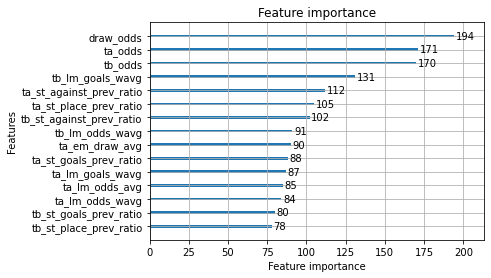

In [60]:
lgbm.plot_importance(model, max_num_features=15)

In [61]:
X_test = test[ FEATURES ].values.astype(np.float32)
y_prob = model.predict(X_test, num_iteration=model.best_iteration )

In [62]:
y_pred = np.argmax(y_prob, axis=1)
test['result_label_pred'] = y_pred

In [63]:
print(classification_report(test[ TARGET ], y_pred))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61      1954
           1       0.50      0.09      0.15      1364
           2       0.54      0.70      0.61      1988

    accuracy                           0.54      5306
   macro avg       0.53      0.49      0.46      5306
weighted avg       0.53      0.54      0.49      5306



In [64]:
test[['result_label','result_label_pred','ta_odds','draw_odds','tb_odds']]

,result_label,result_label_pred,ta_odds,draw_odds,tb_odds
25405,2,2,2.24,3.10,3.63
22848,1,2,1.67,3.60,5.75
3149,1,0,4.13,3.60,1.84
11763,0,0,4.56,4.01,1.75
9448,0,2,1.36,5.25,9.50
...,...,...,...,...,...
20141,1,2,2.26,3.61,3.01
17077,2,2,1.53,4.28,6.20
19605,0,2,1.44,4.75,7.00
11981,1,1,3.30,3.00,2.40


# TRAIN GOALS

In [65]:
TARGET = 'ta_goals'

In [66]:
params['application'] = 'regression'
params['num_classes'] = 1

In [67]:
train_tr, train_val = train_test_split(train, test_size=0.2)

In [68]:
d_train = lgbm.Dataset( train_tr[FEATURES], label=train_tr[TARGET], feature_name=FEATURES )#+ ['session_id'])#, categorical_feature=CAT_FEATURES )
d_valid = lgbm.Dataset( train_val[FEATURES], label=train_val[TARGET], feature_name=FEATURES )#+ ['session_id'])#, categorical_feature=CAT_FEATURES ) 

In [69]:
watchlist = (d_train,d_valid)
evals_result = {}

In [70]:
model = lgbm.train( params, train_set=d_train, num_boost_round=MAX_EPOCHS, valid_sets=watchlist, early_stopping_rounds=STOPPING, evals_result=evals_result, verbose_eval=10 )

/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pas

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8494
[LightGBM] [Info] Number of data points in the train set: 16977, number of used features: 51
[LightGBM] [Info] Start training from score 1.388820
Training until validation scores don't improve for 100 rounds
[10]	training's l2: 1.2772	valid_1's l2: 1.30599
[20]	training's l2: 1.20061	valid_1's l2: 1.27465
[30]	training's l2: 1.15903	valid_1's l2: 1.26857
[40]	training's l2: 1.12255	valid_1's l2: 1.26602
[50]	training's l2: 1.09224	valid_1's l2: 1.26397
[60]	training's l2: 1.06353	valid_1's l2: 1.26446
[70]	training's l2: 1.03884	valid_1's l2: 1.26766
[80]	training's l2: 1.01283	valid_1's l2: 1.26962
[90]	training's l2: 0.988865	valid_1's l2: 1.27176
[100]	training's l2: 0.966866	valid_1's l2: 1.27375
[110]	training's l2: 0.944426	valid_1's l2: 1.27422
[120]	training's l2: 0.923869	valid_1's

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

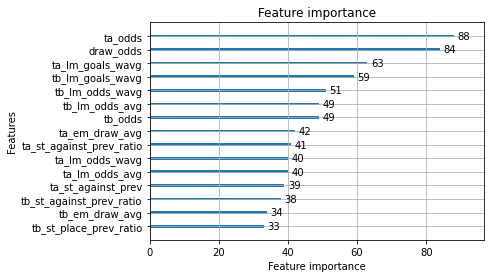

In [71]:
lgbm.plot_importance(model, max_num_features=15)

In [72]:
X_test = test[ FEATURES ].values.astype(np.float32)
y_pred = model.predict(X_test, num_iteration=model.best_iteration )

In [73]:
test['ta_goals_pred'] = y_pred

In [74]:
r2_score(test[TARGET],y_pred)

0.15422635711093224

In [75]:
mean_squared_error(test[TARGET],y_pred)

1.2981448319576012

In [76]:
mean_absolute_error(test[TARGET],y_pred)

0.8846413413642011

In [77]:
mean_absolute_percentage_error(test[TARGET],y_pred)

1396732097302394.0

In [78]:
test[['ta_goals','ta_goals_pred','tb_goals','ta_odds','draw_odds','tb_odds']]

,ta_goals,ta_goals_pred,tb_goals,ta_odds,draw_odds,tb_odds
25405,3,1.324321,2,2.24,3.10,3.63
22848,3,1.771368,3,1.67,3.60,5.75
3149,0,1.023472,0,4.13,3.60,1.84
11763,0,0.967981,4,4.56,4.01,1.75
9448,1,2.390588,2,1.36,5.25,9.50
...,...,...,...,...,...,...
20141,2,1.942186,2,2.26,3.61,3.01
17077,4,1.913612,1,1.53,4.28,6.20
19605,1,2.042053,2,1.44,4.75,7.00
11981,0,1.100335,0,3.30,3.00,2.40


# TRAIN GOAL DIFF

In [79]:
TARGET = 'ta_goals_diff'

In [80]:
params['application'] = 'regression'
params['num_classes'] = 1

In [81]:
train_tr, train_val = train_test_split(train, test_size=0.2)

In [82]:
d_train = lgbm.Dataset( train_tr[FEATURES], label=train_tr[TARGET], feature_name=FEATURES )#+ ['session_id'])#, categorical_feature=CAT_FEATURES )
d_valid = lgbm.Dataset( train_val[FEATURES], label=train_val[TARGET], feature_name=FEATURES )#+ ['session_id'])#, categorical_feature=CAT_FEATURES ) 

In [83]:
watchlist = (d_train,d_valid)
evals_result = {}

In [84]:
model = lgbm.train( params, train_set=d_train, num_boost_round=MAX_EPOCHS, valid_sets=watchlist, early_stopping_rounds=STOPPING, evals_result=evals_result, verbose_eval=10 )

/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/malte.ludewig/Development/software/miniconda3/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pas

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8502
[LightGBM] [Info] Number of data points in the train set: 16977, number of used features: 51
[LightGBM] [Info] Start training from score -0.002945
Training until validation scores don't improve for 100 rounds
[10]	training's l2: 2.59928	valid_1's l2: 2.67787
[20]	training's l2: 2.41844	valid_1's l2: 2.55312
[30]	training's l2: 2.33149	valid_1's l2: 2.53472
[40]	training's l2: 2.26296	valid_1's l2: 2.53214
[50]	training's l2: 2.20206	valid_1's l2: 2.52943
[60]	training's l2: 2.15091	valid_1's l2: 2.53562
[70]	training's l2: 2.10042	valid_1's l2: 2.54087
[80]	training's l2: 2.05364	valid_1's l2: 2.54752
[90]	training's l2: 2.00976	valid_1's l2: 2.54924
[100]	training's l2: 1.96516	valid_1's l2: 2.55059
[110]	training's l2: 1.92187	valid_1's l2: 2.55085
[120]	training's l2: 1.88122	valid_1's l

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

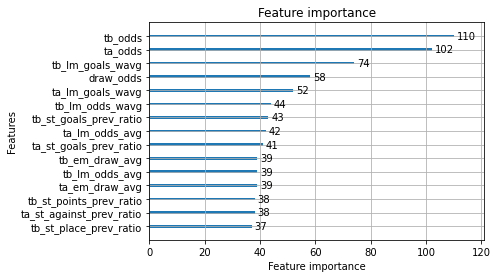

In [85]:
lgbm.plot_importance(model, max_num_features=15)

In [86]:

X_test = test[ FEATURES ].values.astype(np.float32)
y_pred = model.predict(X_test, num_iteration=model.best_iteration )

In [87]:
test['ta_goals_diff_pred'] = y_pred

In [88]:

r2_score(test[TARGET],y_pred)

0.2464361284848543

In [89]:

mean_squared_error(test[TARGET],y_pred)

2.5969890029777933

In [90]:

mean_absolute_error(test[TARGET],y_pred)

1.236663536262614

In [91]:
mean_absolute_percentage_error(test[TARGET],y_pred)

696971002734565.1

In [92]:
test[['ta_goals','ta_goals_diff','ta_goals_diff_pred','tb_goals','ta_odds','draw_odds','tb_odds']]

,ta_goals,ta_goals_diff,ta_goals_diff_pred,tb_goals,ta_odds,draw_odds,tb_odds
25405,3,1,0.390326,2,2.24,3.10,3.63
22848,3,0,0.540013,3,1.67,3.60,5.75
3149,0,0,-0.581658,0,4.13,3.60,1.84
11763,0,-4,-0.839639,4,4.56,4.01,1.75
9448,1,-1,1.681688,2,1.36,5.25,9.50
...,...,...,...,...,...,...,...
20141,2,0,0.193224,2,2.26,3.61,3.01
17077,4,3,0.916085,1,1.53,4.28,6.20
19605,1,-1,1.482795,2,1.44,4.75,7.00
11981,0,0,-0.202580,0,3.30,3.00,2.40
